In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/data(long format).xlsx


<font color = 'light blue'><h1> Importing libraries

<h4> Import all the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score


<font color = 'light blue'><h1> Loading Dataset

### Loading an excel dataset into a pandas DataFrame. 

In [3]:
df=pd.read_excel('/kaggle/input/dataset/data(long format).xlsx')

### Read and analyse the dataset for better understanding

In [4]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,school,time,sex,age,only- child,ses,t1,t2,t3,...,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63
0,1,2,1,1,11,0.0,4.0,5.0,4.0,1.0,...,3.0,2.0,2.0,5.0,3.0,2.0,3.0,3.0,4.0,3.0
1,1,2,2,1,11,0.0,4.0,4.0,4.0,1.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0
2,2,3,1,0,11,1.0,NaN,5.0,5.0,1.0,...,6.0,3.0,4.0,6.0,6.0,4.0,2.0,4.0,4.0,4.0
3,2,3,2,0,11,1.0,NaN,5.0,5.0,1.0,...,4.0,3.0,3.0,3.0,5.0,4.0,5.0,4.0,6.0,4.0
4,3,2,1,0,11,1.0,4.0,5.0,5.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,237,2,2,1,11,0.0,4.0,4.0,4.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
474,238,3,1,1,11,0.0,4.0,4.0,5.0,2.0,...,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
475,238,3,2,1,11,0.0,4.0,5.0,5.0,2.0,...,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0
476,239,2,1,0,12,1.0,3.0,5.0,5.0,1.0,...,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,NaN


<font color = 'light blue'><h1> Data Preprocessing

* <h4>Data preprocessing refers to the steps taken to clean, organize, and transform raw data into a suitable format for analysis or modeling. This often includes handling missing values, normalizing the data and removing outliers. The goal is to improve data quality and ensure that the data is ready for machine learning algorithms.

<font color = 'light blue'><h1>  Missing value Imputation

* <h4> Missing value imputation is an essential technique in data preprocessing that involves filling in missing or NaN (Not a Number) values in a dataset to ensure completeness and improve the performance of machine learning models.

### Checking the missing values in DataFrame df

In [5]:
df.isna().sum()

ID         0
school     0
time       0
sex        0
age        0
          ..
t59        4
t60       13
t61        7
t62        7
t63        6
Length: 70, dtype: int64

### Using df.info() to better understand about missing values, as the dataset contains 70 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 70 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           478 non-null    int64  
 1   school       478 non-null    int64  
 2   time         478 non-null    int64  
 3   sex          478 non-null    int64  
 4   age          478 non-null    int64  
 5   only- child  470 non-null    float64
 6   ses          472 non-null    float64
 7   t1           471 non-null    float64
 8   t2           476 non-null    float64
 9   t3           476 non-null    float64
 10  t4           474 non-null    float64
 11  t5           472 non-null    float64
 12  t6           467 non-null    float64
 13  t7           476 non-null    float64
 14  t8           472 non-null    float64
 15  t9           464 non-null    float64
 16  t10          476 non-null    float64
 17  t11          468 non-null    float64
 18  t12          475 non-null    float64
 19  t13     

**<h3>For handling missing values-** 
- #### mode imputation is used for *categorical columns* like *'ses'* and *'only-child'*, replacing any missing values with the most frequent value (mode) in those columns.
- #### For *numerical columns*, median imputation is applied to replace missing values by filling them with the median of the respective column, as the median is more robust to outliers compared to the mean.

In [7]:
# Impute 'ses' and 'only_child' with mode
df['ses'] = df['ses'].fillna(df['ses'].mode()[0])
df['only- child'] = df['only- child'].fillna(df['only- child'].mode()[0])

# Impute other numerical columns with median
df = df.apply(lambda col: col.fillna(col.median()) if col.dtype != 'O' and col.name not in ['ses', 'only_child'] else col)


<h3>Verifying that there are no remaining missing values in the dataset after imputation.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 70 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           478 non-null    int64  
 1   school       478 non-null    int64  
 2   time         478 non-null    int64  
 3   sex          478 non-null    int64  
 4   age          478 non-null    int64  
 5   only- child  478 non-null    float64
 6   ses          478 non-null    float64
 7   t1           478 non-null    float64
 8   t2           478 non-null    float64
 9   t3           478 non-null    float64
 10  t4           478 non-null    float64
 11  t5           478 non-null    float64
 12  t6           478 non-null    float64
 13  t7           478 non-null    float64
 14  t8           478 non-null    float64
 15  t9           478 non-null    float64
 16  t10          478 non-null    float64
 17  t11          478 non-null    float64
 18  t12          478 non-null    float64
 19  t13     

<h3>Check the total number of missing values for better understanding

In [9]:
df.isna().sum().sum()

0

**<h4>Note :**
- <h5>All missing values in the dataset have been successfully filled

### Overview of the data's distribution

In [10]:
df.describe()

,ID,school,time,sex,age,only- child,ses,t1,t2,t3,...,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,120.000000,2.460251,1.500000,0.525105,11.351464,0.472803,3.782427,3.924686,4.305439,1.910042,...,4.502092,4.560669,4.315900,4.420502,4.366109,4.343096,4.541841,4.110879,4.414226,4.520921
std,69.065035,0.498940,0.500524,0.499893,0.535831,0.499783,0.751480,1.244938,1.025264,1.259872,...,1.457647,1.511480,1.557628,1.567810,1.542501,1.608241,1.439677,1.655385,1.465167,1.382195
min,1.000000,2.000000,1.000000,0.000000,10.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,60.250000,2.000000,1.000000,0.000000,11.000000,0.000000,3.000000,3.000000,4.000000,1.000000,...,3.250000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000
50%,120.000000,2.000000,1.500000,1.000000,11.000000,0.000000,4.000000,4.000000,5.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,179.750000,3.000000,2.000000,1.000000,12.000000,1.000000,4.000000,5.000000,5.000000,2.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,239.000000,3.000000,2.000000,1.000000,13.000000,1.000000,5.000000,5.000000,5.000000,5.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [11]:
df

,ID,school,time,sex,age,only- child,ses,t1,t2,t3,...,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63
0,1,2,1,1,11,0.0,4.0,5.0,4.0,1.0,...,3.0,2.0,2.0,5.0,3.0,2.0,3.0,3.0,4.0,3.0
1,1,2,2,1,11,0.0,4.0,4.0,4.0,1.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0
2,2,3,1,0,11,1.0,4.0,5.0,5.0,1.0,...,6.0,3.0,4.0,6.0,6.0,4.0,2.0,4.0,4.0,4.0
3,2,3,2,0,11,1.0,4.0,5.0,5.0,1.0,...,4.0,3.0,3.0,3.0,5.0,4.0,5.0,4.0,6.0,4.0
4,3,2,1,0,11,1.0,4.0,5.0,5.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,237,2,2,1,11,0.0,4.0,4.0,4.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
474,238,3,1,1,11,0.0,4.0,4.0,5.0,2.0,...,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
475,238,3,2,1,11,0.0,4.0,5.0,5.0,2.0,...,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0
476,239,2,1,0,12,1.0,3.0,5.0,5.0,1.0,...,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0


<font color = 'light blue'><h1>  Outlier Detection

* <h4>Outlier detection refers to the process of identifying data points that are significantly different or inconsistent from the rest of the dataset. These data points, called outliers. Different methods, like statistical tests (Z-score, IQR), clustering, and visualization techniques (box plots, scatter plots), can be used to detect outliers.

## <font color = 'green'> Z score

* <h4>The Z-score method standardizes data by measuring how many standard deviations a data point deviates from the mean. This helps in detecting extreme values that differ significantly from the rest of the data, making it a useful method for outlier detection.
* <h4>The mean represents the central tendency of the data and standard deviation shows how spread out the data points are.

### How the Z-score Detects Outliers
* <h4>The Z-score detects outliers by first selecting only numerical columns from the dataset, ensuring that categorical data is excluded from the process. The Z-score for each numerical column is computed using the formula:

* <h4>Z= (X−μ)/σ
* <h4>Where: X = Individual data point, μ = Mean of the column and σ = Standard deviation of the column
* <h4>A data point is considered an outlier if its absolute Z-score is greater than 3. The function then identifies the indices of the outliers based on this threshold and returns the row and column indices where the Z-score exceeds the threshold.

In [12]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = zscore(data.select_dtypes(include=np.number), nan_policy='omit')
    outlier_indices = np.where(np.abs(z_scores) > threshold)
    return outlier_indices

outlier_indices = detect_outliers_zscore(df)
print(f"Outliers detected at indices: {outlier_indices}")

Outliers detected at indices: (array([  9,  10,  75, 108, 109, 187, 198, 199, 227, 234, 234, 235, 242,
       243, 344, 370, 371, 398, 399, 415, 428, 448, 448, 449]), array([8, 8, 8, 8, 8, 8, 4, 4, 8, 4, 8, 4, 4, 4, 8, 8, 8, 4, 4, 8, 8, 4,
       8, 4]))


### Number of detected outliers

In [13]:
len(outlier_indices[0])

24

### Number of outliers for detected column

In [14]:
z_scores = df.drop(columns=['ses']).apply(lambda x: (x - x.mean()) / x.std())   #Removes the 'ses' column before applying Z-score

# Threshold for Z-score (commonly 3)
threshold = 3

# Count the number of outliers for each column
outliers_count = (np.abs(z_scores) > threshold).sum()
outliers_count[outliers_count.values>0]


age    10
t2     14
dtype: int64

<font color = 'light blue'><h1> Outlier Removal

### The Z-score method removes outliers in the following steps:
* <h4> Firstly, it converts all Z-score values into positive numbers because outliers can be either very high or very low, and we want to detect both.
* <h4>Secondly, "np.abs(z_scores) < threshold" checks if each value is less than the threshold (3). If true, the value is considered normal (not an outlier); if false, the value is classified as an outlier.
* <h4>Finally, if any column in a row contains an outlier, the entire row is removed, ensuring that only rows where all values fall within the threshold are retained."

In [15]:
#To get a cleaned dataset, remove rows with any outliers

df_cleaned = df[(np.abs(z_scores) < threshold).all(axis=1)]

### Check the unique values in the 'ses' column

In [16]:
df_cleaned.ses.value_counts()

ses
4.0    209
3.0    156
5.0     80
2.0     11
Name: count, dtype: int64

### Check how many outliers were removed

In [17]:
len(df_cleaned),len(df), f'Removed = {len(df)-len(df_cleaned)}'

(456, 478, 'Removed = 22')

### An overview of the cleaned dataset

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 477
Data columns (total 70 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           456 non-null    int64  
 1   school       456 non-null    int64  
 2   time         456 non-null    int64  
 3   sex          456 non-null    int64  
 4   age          456 non-null    int64  
 5   only- child  456 non-null    float64
 6   ses          456 non-null    float64
 7   t1           456 non-null    float64
 8   t2           456 non-null    float64
 9   t3           456 non-null    float64
 10  t4           456 non-null    float64
 11  t5           456 non-null    float64
 12  t6           456 non-null    float64
 13  t7           456 non-null    float64
 14  t8           456 non-null    float64
 15  t9           456 non-null    float64
 16  t10          456 non-null    float64
 17  t11          456 non-null    float64
 18  t12          456 non-null    float64
 19  t13          

**<h4>Note :**
- <h5>Our data is clean now, without any outliers.

### Identify the unique categories in the 'ses' column

In [19]:
df_cleaned['ses'].unique()

array([4., 5., 3., 2.])

# <font color = 'light blue'> Normalization

* <h4>Normalization is the process of scaling numerical data to fit within a specific range, usually between 0 and 1

### Check the cleaned data before normalization

In [20]:
df_cleaned

,ID,school,time,sex,age,only- child,ses,t1,t2,t3,...,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63
0,1,2,1,1,11,0.0,4.0,5.0,4.0,1.0,...,3.0,2.0,2.0,5.0,3.0,2.0,3.0,3.0,4.0,3.0
1,1,2,2,1,11,0.0,4.0,4.0,4.0,1.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0
2,2,3,1,0,11,1.0,4.0,5.0,5.0,1.0,...,6.0,3.0,4.0,6.0,6.0,4.0,2.0,4.0,4.0,4.0
3,2,3,2,0,11,1.0,4.0,5.0,5.0,1.0,...,4.0,3.0,3.0,3.0,5.0,4.0,5.0,4.0,6.0,4.0
4,3,2,1,0,11,1.0,4.0,5.0,5.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,237,2,2,1,11,0.0,4.0,4.0,4.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
474,238,3,1,1,11,0.0,4.0,4.0,5.0,2.0,...,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
475,238,3,2,1,11,0.0,4.0,5.0,5.0,2.0,...,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0
476,239,2,1,0,12,1.0,3.0,5.0,5.0,1.0,...,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0


## <font color = 'green'>Z-score Normalization

### Z-score normalization works in the following steps:
* <h4> First, it defines a function named z_score_normalization. Then, it creates a copy of the input DataFrame (df) to avoid modifying the original data. It loops through all columns in the DataFrame, checking if the column is not the excluded one ('ses'). If the column is not 'ses', it proceeds to calculate the mean and standard deviation for that column, applying Z-score normalization using the formula:

* <h4>Z= (X−μ)/σ

* <h4>The normalized values are then updated in normalized_df. Finally, the function returns the normalized DataFrame after processing all columns.


In [21]:
# Z-score normalization, excluding 'ses'
def z_score_normalization(df, exclude_column):
    normalized_df = df.copy()
    for column in df.columns:
        if column != exclude_column:
            mean = df[column].mean()
            std = df[column].std()
            normalized_df[column] = (df[column] - mean) / std
    return normalized_df

normalized_df = z_score_normalization(df_cleaned, 'ses')

### Overview of data after normalization

In [22]:
#After normalization
normalized_df

,ID,school,time,sex,age,only- child,ses,t1,t2,t3,...,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63
0,-1.716358,-0.931100,-0.994531,0.918857,-0.632280,-0.972953,4.0,0.847829,-0.493133,-0.703182,...,-1.091679,-1.788052,-1.559364,0.333967,-0.937138,-1.511115,-1.151145,-0.742107,-0.318162,-1.163053
1,-1.716358,-0.931100,1.003294,0.918857,-0.632280,-0.972953,4.0,0.009196,-0.493133,-0.703182,...,0.302735,-0.423447,-0.248636,-0.322451,-0.276651,-0.246769,-0.431087,-0.123458,0.372704,-0.423371
2,-1.701874,1.071643,-0.994531,-1.085922,-0.632280,1.025545,4.0,0.847829,0.690386,-0.703182,...,0.999941,-1.105749,-0.248636,0.990386,1.044322,-0.246769,-1.871203,-0.123458,-0.318162,-0.423371
3,-1.701874,1.071643,1.003294,-1.085922,-0.632280,1.025545,4.0,0.847829,0.690386,-0.703182,...,-0.394472,-1.105749,-0.904000,-0.978870,0.383835,-0.246769,0.288971,-0.123458,1.063569,-0.423371
4,-1.687391,-0.931100,-0.994531,-1.085922,-0.632280,1.025545,4.0,0.847829,0.690386,-0.703182,...,0.302735,0.258856,0.406728,0.333967,0.383835,0.385404,0.288971,-1.360756,-1.009027,-0.423371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,1.701684,-0.931100,1.003294,0.918857,-0.632280,-0.972953,4.0,0.009196,-0.493133,-0.703182,...,0.302735,0.258856,0.406728,0.333967,0.383835,0.385404,0.288971,0.495190,0.372704,0.316312
474,1.716167,1.071643,-0.994531,0.918857,-0.632280,-0.972953,4.0,0.009196,0.690386,0.129678,...,0.302735,-0.423447,-0.248636,0.333967,0.383835,0.385404,0.288971,0.495190,0.372704,0.316312
475,1.716167,1.071643,1.003294,0.918857,-0.632280,-0.972953,4.0,0.847829,0.690386,0.129678,...,-0.394472,-0.423447,-0.248636,-0.322451,0.383835,0.385404,0.288971,-0.123458,0.372704,0.316312
476,1.730650,-0.931100,-0.994531,-1.085922,1.456993,1.025545,3.0,0.847829,0.690386,-0.703182,...,0.999941,0.941159,0.406728,0.990386,1.044322,1.017576,1.009029,1.113839,1.063569,0.316312


### Check the unique values in the 'ses' column

In [23]:
normalized_df.ses.unique()

array([4., 5., 3., 2.])

# <font color = 'light green'>Feature Selction

* <h4>Feature selection is the process of choosing a subset of the most relevant features from a larger set of features in a dataset to use in building a model.

### <font color = 'green'>Principal Component Analysis

* <h4>PCA (Principal Component Analysis) is a dimensionality reduction technique used to reduce the number of features in a dataset while retaining as much variance (information) as possible.

### How PCA Works:
1. <h4>Firstly, the 'ses' column is excluded from the dataset because PCA is applied only to the numerical features, and categorical columns are typically not included. The PCA() function initializes the PCA model, and fit_transform(X) applies PCA to the dataset, transforming the original features into principal components (stored in X_pca). 

2. <h4>The explained variance ratio tells us how much of the variance in the original data is captured by each principal component. Cumulative variance is the sum of the explained variance from all components. The expression "np.argmax(cumulative_variance >= 0.95) + 1" identifies the number of principal components needed to retain at least 95% of the total variance.

3. <h4>Then, the PCA model is refitted using the selected number of components (n_components) that capture at least 95% of the variance. The result is a reduced dataset with fewer features, but most of the original information is preserved.

4. <h4>The pca.components_ provides the weights (loadings) for each feature in the principal components. Features that have a significant contribution to each principal component are identified by looking for those with absolute loadings above a specified threshold (e.g., 0.1). These features are considered important for the principal components.

5. <h4>Finally, the 'ses' column is added back to the dataset as it is typically kept for analysis, even though it was excluded from PCA.


In [24]:
X = normalized_df.drop(columns=['ses'])

# Perform PCA

pca = PCA()
X_pca = pca.fit_transform(X)

# Determine explained variance ratio for each component

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Calculate cumulative variance and decide the number of components to retain

cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Retain 95% of variance
print(f"Number of components to retain 95% variance: {n_components}")

# Refit PCA with the selected number of components

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Analyze feature contributions to each retained component

pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(n_components)]
)
print("\nPCA Components (Feature Contributions):")
print(pca_components)

# Identify important features (e.g., based on absolute loadings)

threshold = 0.1  # Define a threshold for feature importance
important_features = set()
for pc in pca_components.index:
    features = pca_components.loc[pc].abs()  # Absolute value of loadings
    important_features.update(features[features >= threshold].index)

# Return only the important features

important_features = list(important_features)
print("\nImportant Features Selected by PCA:")
print('Amount',len(important_features))
print(important_features)

#Output the dataset with only the important features

selected_features_df = normalized_df[important_features]
selected_features_df['ses'] = normalized_df['ses']

Explained Variance Ratio: [0.28370799 0.08125416 0.0504044  0.04589942 0.032563   0.02094567
 0.02031069 0.01970853 0.01881599 0.01674685 0.01633536 0.01543057
 0.01447151 0.01408627 0.01343765 0.01312011 0.01259413 0.01237065
 0.0121627  0.01148928 0.01127883 0.01069572 0.01066306 0.01018919
 0.00969622 0.00940697 0.00910629 0.00874532 0.00857433 0.00826336
 0.00796384 0.00765907 0.00762957 0.00741135 0.00706884 0.0069838
 0.00672984 0.00661997 0.00631747 0.00613976 0.00572671 0.00562586
 0.0055593  0.00512834 0.0049853  0.00493175 0.00472388 0.00453826
 0.00450349 0.00423237 0.00416331 0.00408955 0.00393575 0.00382516
 0.00369764 0.00351106 0.0033105  0.00321398 0.00307075 0.00297326
 0.00291108 0.00273523 0.00268606 0.00242496 0.00237207 0.00226103
 0.00209677 0.00207073 0.00169811]
Number of components to retain 95% variance: 52

PCA Components (Feature Contributions):
            ID    school      time       sex       age  only- child        t1  \
PC1   0.008591 -0.034161  0.01916

### Check the names of selected features

In [25]:
selected_features_df.columns

Index(['t31', 't43', 't59', 't56', 't26', 't12', 't4', 't28', 't45', 't5',
       't48', 't61', 't53', 't20', 't37', 't8', 't50', 't55', 't13', 't27',
       't41', 't18', 't21', 't32', 't54', 't62', 't63', 't25', 't10', 't44',
       't47', 't40', 't51', 't58', 't2', 'ID', 'only- child', 't34', 't15',
       't17', 't36', 't42', 't33', 't49', 't23', 't19', 't35', 'time', 'age',
       't30', 't3', 't22', 't1', 't60', 't39', 't14', 't29', 't7', 'sex',
       't46', 't24', 't52', 'school', 't11', 't16', 't9', 't6', 't38', 't57',
       'ses'],
      dtype='object')

### Display a summary of the DataFrame

In [26]:
selected_features_df.info()

selected_features_df.ses

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 477
Data columns (total 70 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   t31          456 non-null    float64
 1   t43          456 non-null    float64
 2   t59          456 non-null    float64
 3   t56          456 non-null    float64
 4   t26          456 non-null    float64
 5   t12          456 non-null    float64
 6   t4           456 non-null    float64
 7   t28          456 non-null    float64
 8   t45          456 non-null    float64
 9   t5           456 non-null    float64
 10  t48          456 non-null    float64
 11  t61          456 non-null    float64
 12  t53          456 non-null    float64
 13  t20          456 non-null    float64
 14  t37          456 non-null    float64
 15  t8           456 non-null    float64
 16  t50          456 non-null    float64
 17  t55          456 non-null    float64
 18  t13          456 non-null    float64
 19  t27          

0      4.0
1      4.0
2      4.0
3      4.0
4      4.0
      ... 
473    4.0
474    4.0
475    4.0
476    3.0
477    3.0
Name: ses, Length: 456, dtype: float64

### Mapping and transforming values in the 'ses' column using a Dictionary

In [27]:
def x(x):
    dic={2:0,3:1,4:2,5:3}
    new=dic[x]
    x=new
    return x

In [28]:
selected_features_df.ses=selected_features_df.ses.apply(x)

### Counting 'ses' Values after transform

In [29]:
selected_features_df.ses.value_counts()

ses
2    209
1    156
3     80
0     11
Name: count, dtype: int64

# <font color = 'light blue'>K fold cross validation

* <h4>K-fold cross-validation is a robust model validation technique used to assess the performance of machine learning models, particularly in scenarios where the data is limited. It ensures that the model's evaluation is not biased or overly dependent on any single portion of the data.
* <h4>Since the classes are imbalanced, we used stratified K-fold cross-validation. Stratified K-fold cross-validation is chosen to ensure each fold maintains the class distribution, giving a more accurate model evaluation.

## Evaluating multiple machine learning models using Stratified K-Fold Cross-Validation. 
* <h4>The process begins by separating features and the target variable. A Stratified K-Fold Cross-Validation with 5 splits is initialized to maintain class distribution across folds.
* <h4>A dictionary is created to store multiple classification models for evaluation. Another dictionary is initialized to store accuracy scores for each model across different folds.
* <h4>The models are iterated through, with each being trained on the training set and tested on the corresponding validation set. Predictions are generated, and classification accuracy is computed for each fold. These accuracy scores are stored in the results dictionary.
* <h4>Finally, the average accuracy across all folds is computed and displayed along with individual fold accuracies

In [30]:
# Separate features and target

X = selected_features_df.drop(columns=['ses'])
y = selected_features_df['ses']

# Initialize StratifiedKFold

n_splits = 5      # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# List of models to evaluate

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42, probability=True),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Placeholder for results
results = {model_name: [] for model_name in models.keys()}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_test)

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        results[model_name].append(accuracy)

# Output results
for model_name, accuracies in results.items():
    avg_accuracy = sum(accuracies) / len(accuracies)
    print(f"{model_name} - Average Accuracy: {avg_accuracy:.4f}, Fold Accuracies: {accuracies}")


Evaluating Decision Tree...
Evaluating KNN...
Evaluating SVM...
Evaluating AdaBoost...
Evaluating XGBoost...
Evaluating Logistic Regression...
Evaluating Random Forest...
Decision Tree - Average Accuracy: 0.4210, Fold Accuracies: [0.45652173913043476, 0.3626373626373626, 0.3956043956043956, 0.45054945054945056, 0.43956043956043955]
KNN - Average Accuracy: 0.4671, Fold Accuracies: [0.45652173913043476, 0.5274725274725275, 0.3956043956043956, 0.4835164835164835, 0.4725274725274725]
SVM - Average Accuracy: 0.4736, Fold Accuracies: [0.5, 0.5054945054945055, 0.45054945054945056, 0.4835164835164835, 0.42857142857142855]
AdaBoost - Average Accuracy: 0.3795, Fold Accuracies: [0.31521739130434784, 0.38461538461538464, 0.3956043956043956, 0.4175824175824176, 0.38461538461538464]
XGBoost - Average Accuracy: 0.5132, Fold Accuracies: [0.5108695652173914, 0.4945054945054945, 0.5164835164835165, 0.5384615384615384, 0.5054945054945055]
Logistic Regression - Average Accuracy: 0.4124, Fold Accuracies: [

**<h3>Note :**
- <h4>Since our dataset has a highly imbalanced class distribution, we use upsampling to address this imbalance. This helps ensure that the model learns from all classes equally, preventing bias towards the majority class and improving classification performance

### Balancing the dataset using upsampling. 
* <h4>First, unique classes of the target variable (ses) are identified. A dictionary is created to store subsets of the dataset corresponding to each class. The target class size is determined based on the majority class to ensure all classes have an equal number of samples.
* <h4>Using the resample function, each minority class is upsampled with replacement to match the majority class size. The upsampled subsets are then combined to form a balanced dataset.
* <h4>Finally, the original and upsampled class distributions are displayed to verify the effectiveness of the balancing process

In [31]:
from sklearn.utils import resample
classes = selected_features_df['ses'].unique()
dfs = {cls: selected_features_df[selected_features_df['ses'] == cls] for cls in classes}

# Define the target class size
target_size = max(len(dfs[cls]) for cls in classes)  # For upsampling (match majority)
balanced_size = min(len(dfs[cls]) for cls in classes)  # For downsampling (reduce to minority)

# Perform upsampling 
upsampled_dfs = [
    resample(dfs[cls], replace=True, n_samples=target_size, random_state=42)
    for cls in classes
]

# upsampled data
balanced_df_upsampled = pd.concat(upsampled_dfs)


# Display results
print("Original Data Distribution:")
print(selected_features_df['ses'].value_counts())

print("\nUpsampled Data Distribution:")
print(balanced_df_upsampled['ses'].value_counts())


Original Data Distribution:
ses
2    209
1    156
3     80
0     11
Name: count, dtype: int64

Upsampled Data Distribution:
ses
2    209
3    209
1    209
0    209
Name: count, dtype: int64


### Overview of upsampled data

In [32]:
balanced_df_upsampled

,t31,t43,t59,t56,t26,t12,t4,t28,t45,t5,...,t24,t52,school,t11,t16,t9,t6,t38,t57,ses
250,-0.974211,1.903489,-1.511115,-1.559364,0.865210,0.942025,0.772595,-0.738001,0.991239,0.896318,...,0.505214,-1.177708,1.071643,0.051901,-0.362368,1.657631,-0.940998,0.987350,-0.978870,2
407,-0.974211,-0.806160,1.017576,1.062092,0.865210,0.942025,0.772595,-0.738001,0.991239,0.896318,...,1.243604,0.920085,1.071643,-1.382462,1.133014,1.657631,-0.940998,0.987350,0.990386,2
216,-0.198923,0.097056,-0.878942,-0.248636,-0.011536,0.098089,-0.097290,-0.738001,0.991239,0.037660,...,-1.709955,0.920085,1.071643,-1.382462,-1.857750,0.854358,-0.940998,-0.680174,-1.635289,2
18,-0.198923,-0.806160,1.017576,1.062092,0.865210,0.942025,0.772595,-0.738001,0.991239,0.896318,...,-1.709955,0.920085,1.071643,1.486265,1.133014,1.657631,-0.138951,0.987350,0.990386,2
254,2.126943,-0.806160,0.385404,-0.904000,-0.011536,-0.745847,-0.097290,-0.738001,-2.191895,-0.820997,...,-0.971566,-2.576237,-0.931100,1.486265,-1.857750,1.657631,2.267189,0.987350,-0.322451,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,-0.974211,0.097056,-0.878942,-0.904000,-0.888282,-0.745847,-0.967174,1.724403,-0.600328,-1.679654,...,-0.233176,-1.177708,-0.931100,0.051901,-0.362368,0.051085,1.465142,-0.680174,-0.978870,0
226,0.576366,1.000273,-1.511115,-0.904000,-2.641774,0.942025,-1.837058,-0.738001,-2.191895,0.896318,...,-0.971566,-1.876973,-0.931100,0.051901,-0.362368,-0.752188,-0.940998,-2.347699,-0.322451,0
59,1.351655,1.903489,1.017576,0.406728,-1.765028,-0.745847,-0.097290,0.903602,-2.191895,-0.820997,...,-0.233176,-0.478444,1.071643,0.051901,-0.362368,0.051085,-0.138951,-1.513936,0.990386,0
226,0.576366,1.000273,-1.511115,-0.904000,-2.641774,0.942025,-1.837058,-0.738001,-2.191895,0.896318,...,-0.971566,-1.876973,-0.931100,0.051901,-0.362368,-0.752188,-0.940998,-2.347699,-0.322451,0


# <font color = 'light blue'> Upsampled data

### Evaluating multiple machine learning models using Stratified K-Fold Cross-Validation on upsampled dataset. 
* <h4>The features and the target variable are separated. Stratified K-Fold Cross-Validation with 5 splits is initialized to preserve the class distribution across folds. A dictionary containing various classification models is created for evaluation, including Decision Tree, K-Nearest Neighbors, Support Vector Machine, AdaBoost, XGBoost, Logistic Regression, and Random Forest.

* <h4>Another dictionary is structured to store multiple performance metrics (accuracy, F1-score, precision, recall, and ROC AUC) for each model across different folds. For each fold, each model is trained on the training set (X_train, y_train) and evaluated on the test set (X_test, y_test). Predictions are generated, and corresponding performance metrics are computed. If a model supports probability predictions, the ROC AUC (Area Under the Receiver Operating Characteristic Curve) is also calculated.

* <h4>The performance results are stored in the dictionary and averaged across the folds. Finally, the overall performance of each model is displayed, offering a comprehensive comparison of their classification effectiveness.

Evaluating Decision Tree...


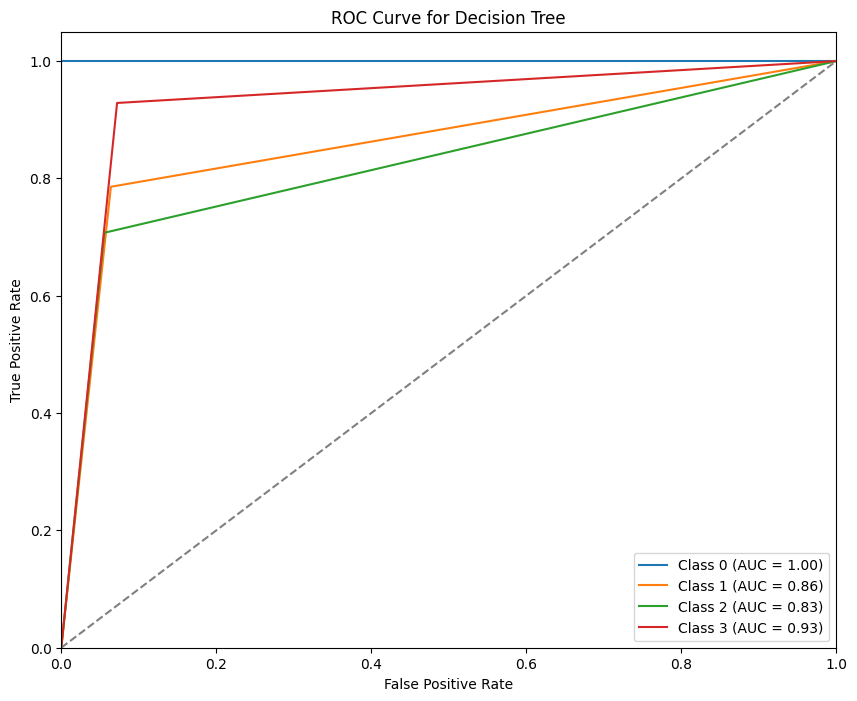

Evaluating KNN...


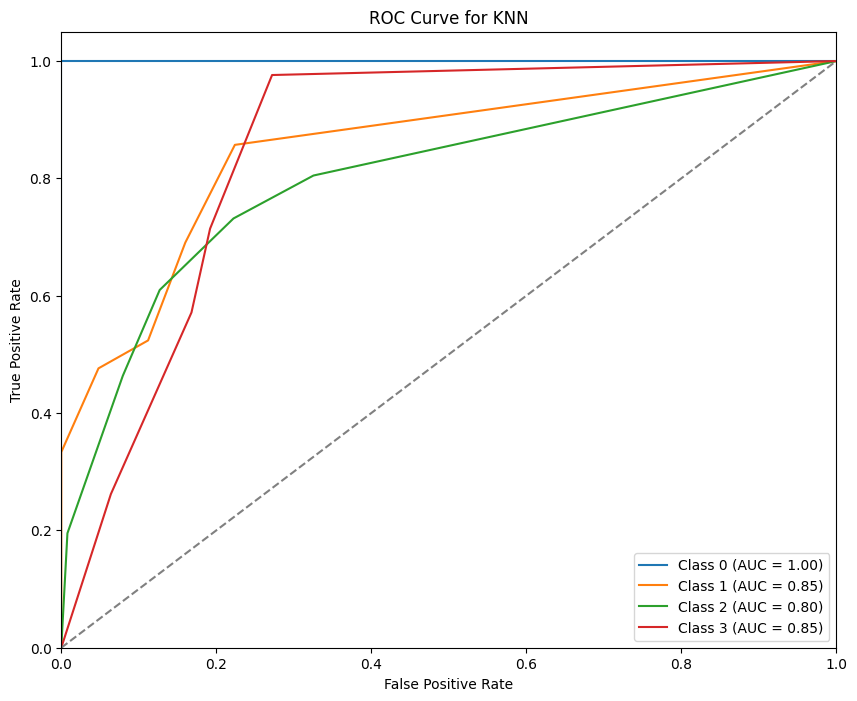

Evaluating SVM...


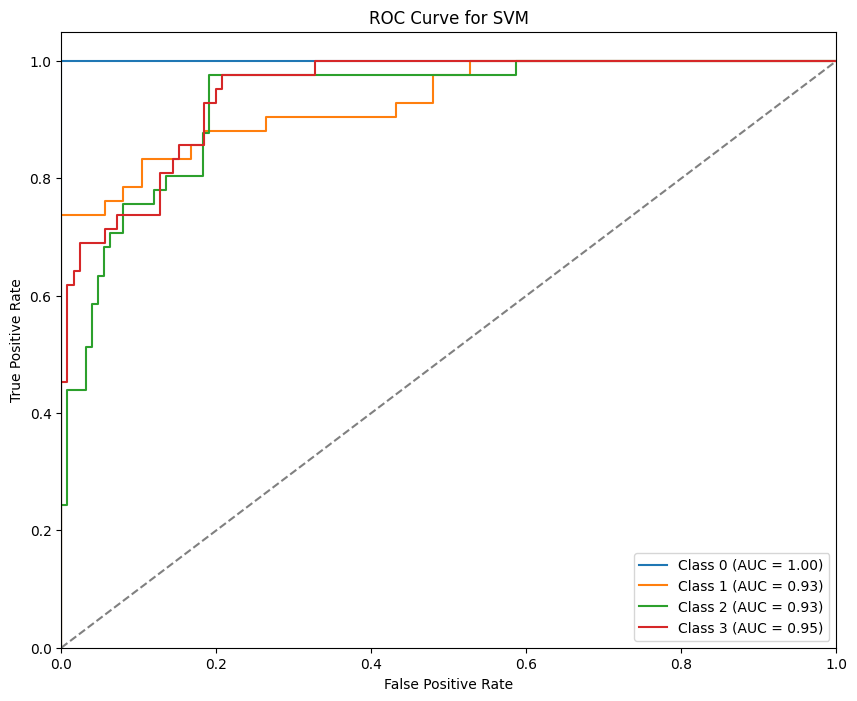

Evaluating AdaBoost...


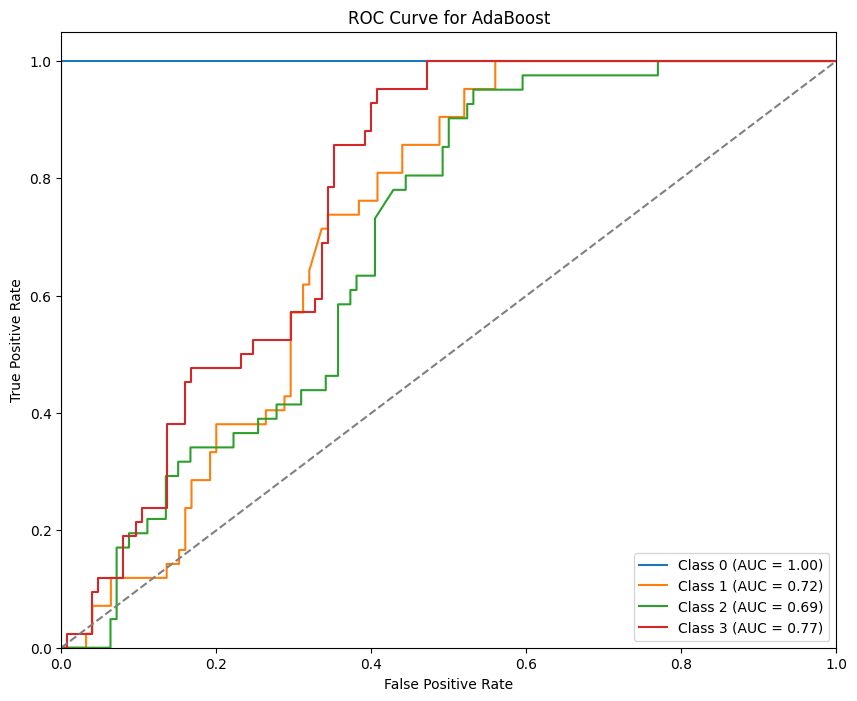

Evaluating XGBoost...


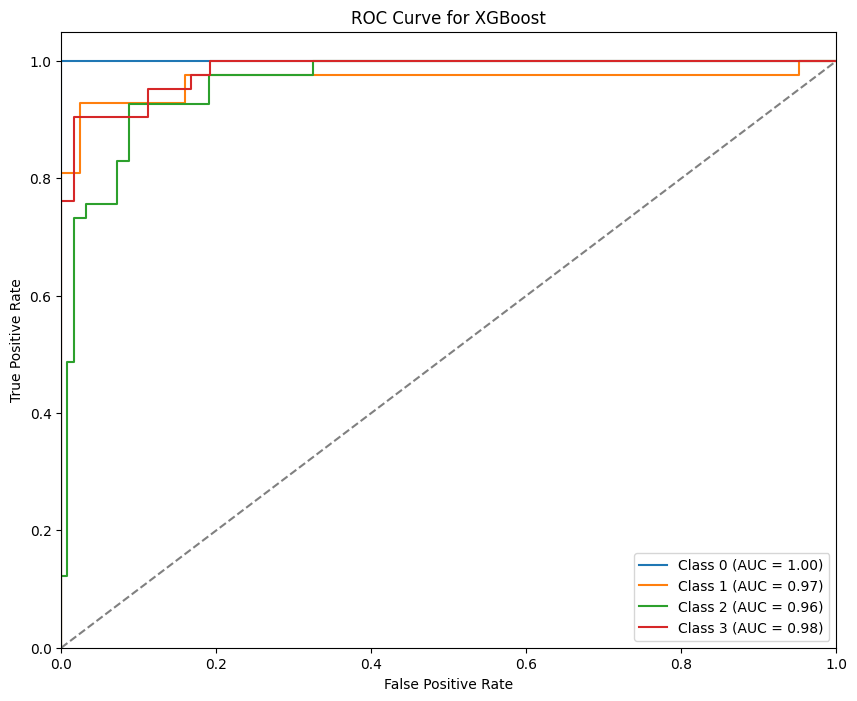

Evaluating Logistic Regression...


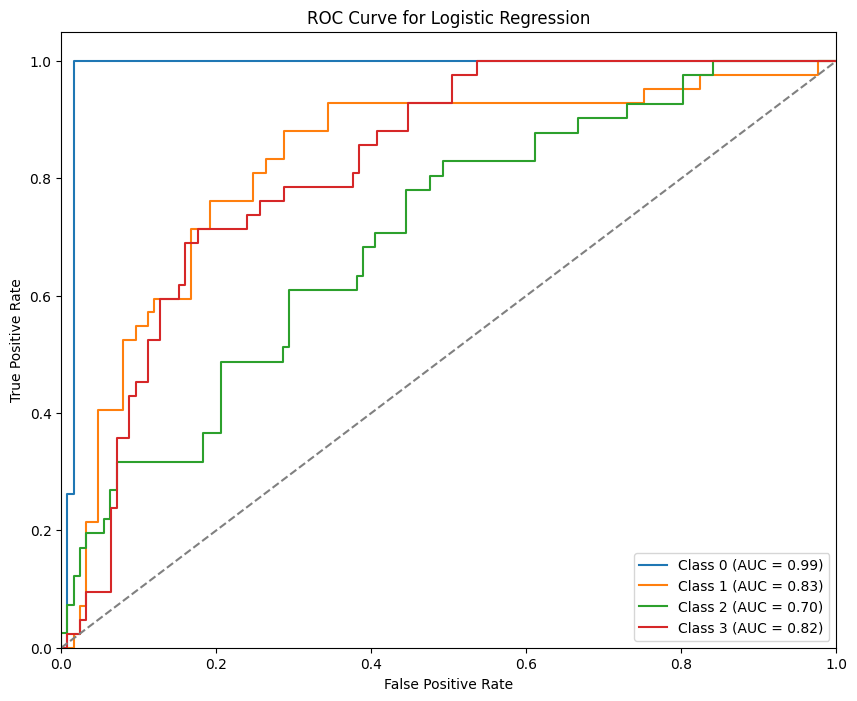

Evaluating Random Forest...


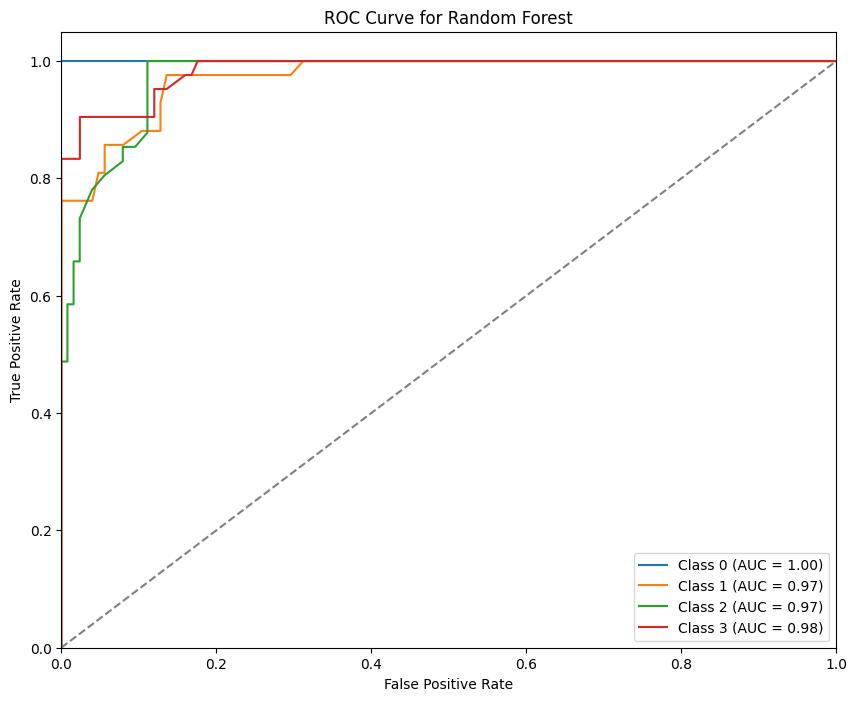

Decision Tree - Metrics:
  Average Accuracy: 0.8721
  Average F1 Score: 0.8701
  Average Precision: 0.8728
  Average Recall: 0.8720
  Average ROC AUC: 0.9147

KNN - Metrics:
  Average Accuracy: 0.7034
  Average F1 Score: 0.7043
  Average Precision: 0.7134
  Average Recall: 0.7036
  Average ROC AUC: 0.8938

SVM - Metrics:
  Average Accuracy: 0.8254
  Average F1 Score: 0.8240
  Average Precision: 0.8269
  Average Recall: 0.8254
  Average ROC AUC: 0.9571

AdaBoost - Metrics:
  Average Accuracy: 0.5920
  Average F1 Score: 0.5884
  Average Precision: 0.5910
  Average Recall: 0.5920
  Average ROC AUC: 0.7985

XGBoost - Metrics:
  Average Accuracy: 0.9007
  Average F1 Score: 0.9002
  Average Precision: 0.9060
  Average Recall: 0.9006
  Average ROC AUC: 0.9840

Logistic Regression - Metrics:
  Average Accuracy: 0.6962
  Average F1 Score: 0.6921
  Average Precision: 0.6927
  Average Recall: 0.6961
  Average ROC AUC: 0.8650

Random Forest - Metrics:
  Average Accuracy: 0.8840
  Average F1 Score:

In [33]:
from sklearn.metrics import roc_curve, auc

# Separate features and target
X = balanced_df_upsampled.drop(columns=['ses'])
y = balanced_df_upsampled['ses']

# Initialize StratifiedKFold
n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# List of models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42, probability=True),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Placeholder for results
results = {model_name: {"accuracy": [], "f1": [], "roc_auc": [], "precision": [], "recall": []} for model_name in models.keys()}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')

        # Handle ROC AUC for multiclass
        roc_auc = None
        if y_prob is not None:
            try:
                roc_auc = roc_auc_score(
                    y_test, y_prob, average='weighted', multi_class='ovr'
                )
            except ValueError:
                print(f"ROC AUC cannot be computed for {model_name}.")

        # Store metrics
        results[model_name]["accuracy"].append(accuracy)
        results[model_name]["f1"].append(f1)
        results[model_name]["precision"].append(precision)
        results[model_name]["recall"].append(recall)
        if roc_auc is not None:
            results[model_name]["roc_auc"].append(roc_auc)

    # Plot ROC curve for each fold and each class
    if y_prob is not None:
        plt.figure(figsize=(10, 8))
        for i in range(y_prob.shape[1]):  # loop through each class
            fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
            roc_auc_value = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_value:.2f})')

        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.show()

# Output results
for model_name, metrics in results.items():
    avg_accuracy = sum(metrics["accuracy"]) / len(metrics["accuracy"])
    avg_f1 = sum(metrics["f1"]) / len(metrics["f1"])
    avg_precision = sum(metrics["precision"]) / len(metrics["precision"])
    avg_recall = sum(metrics["recall"]) / len(metrics["recall"])
    avg_roc_auc = (sum(metrics["roc_auc"]) / len(metrics["roc_auc"])) if metrics["roc_auc"] else None

    print(f"{model_name} - Metrics:")
    print(f"  Average Accuracy: {avg_accuracy:.4f}")
    print(f"  Average F1 Score: {avg_f1:.4f}")
    print(f"  Average Precision: {avg_precision:.4f}")
    print(f"  Average Recall: {avg_recall:.4f}")
    if avg_roc_auc is not None:
        print(f"  Average ROC AUC: {avg_roc_auc:.4f}")
    print()